<a href="https://colab.research.google.com/github/ardiwolayan/UTS_KCBV/blob/main/Operasi_Image_Filtering_dan_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering

## Konsep Filtering

Image Filtering (atau *convolution*) merupakan salah satu teknik pengolahan citra yang banyak digunakan. Filtering menggunakan prinsip pengolahan citra sederhana dimana setiap band pada sebuah citra dianggap sebagai sebuah matriks. Selanjutnya, operasi matematika dilakukan pada matriks tersebut untuk memperoleh atau menguatkan fitur tertentu yang ada pada citra tersebut. Operasi Image Filtering sering digunakan sebagai langkah awal dalam pengolahan (pre-processing) citra, misalnya untuk menghilangkan noise atau memperkuat fitur dengan ciri tertentu pada citra.

Image Filtering bekerja dengan cara menjalankan sebuah *'kernel'* (ingat biji jagung: berukuran kecil) atau matriks persegi dengan ukuran tertentu pada seluruh citra secara bertahap. Inilah mengapa operasi kernel pada seringkali disebut sebagai *'moving window'*. [Link berikut](http://setosa.io/ev/image-kernels/) memberikan penjelasan yang sangat baik mengenai bagaimana sebuah filter bekerja.

![](https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Dengan perkembangan pada bidang Deep Learning, Convolution menjadi salah satu teknik penting yang digunakan untuk mengekstraksi fitur level rendah dari sebuah gambar. Karenanya, memahami konsep ini diperlukan untuk memahami bagaimana cara Deep Learning bekerja, khususnya pada metode seperti Convolution Neural Network (CNN). Lihat [link berikut](https://poloclub.github.io/cnn-explainer/#article-convolution) untuk memberikan gambaran bagaimana algoritma CNN menggunakan convolution untuk mengenali sebuah objek.

Jika istilah **filter** terasa familiar bagi Anda, mungkin hal ini karena banyak sosial media (seperti instagram) yang menggunakan [prinsip yang sama](https://onezero.medium.com/how-instagrams-viral-face-filters-work-5c98ba05122f) untuk mengolah foto dari penggunanya.

![](https://miro.medium.com/max/600/1*WBLrs0Gv7kmIYjGICFu4zg.gif)

## Melakukan Operasi Image Filtering dengan OpenCV


**1. Low-Pass Filtering**

OpenCV memiliki [berbagai operasi](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) yang dapat digunakan untuk proses filtering, diantaranya: Averaging, Gaussian, Median filter dan Billateral filtering. Pada bagian ini akan dilakukan beberapa percobaan menggunakan fungsi-fungsi OpenCV untuk melakukan Image Filtering. Gunakan data yang diberikan sebagai latihan, atau gunakan gambar yang dapat Anda temukan dari internet.

Sebagai latihan pertama, akan dilakukan filtering pada gambar `cat.jpg` dengan menggunakan kernel berupa matriks berukuran [5x5] sebagai berikut:

K = 
$\frac {1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$

In [1]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving gelombang.png to gelombang.png


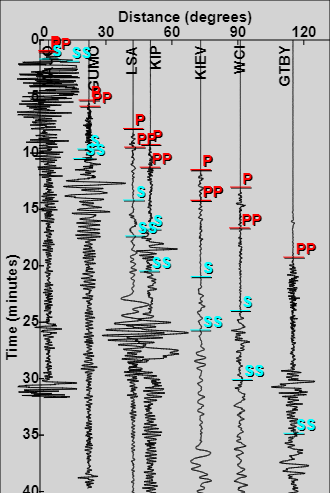

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


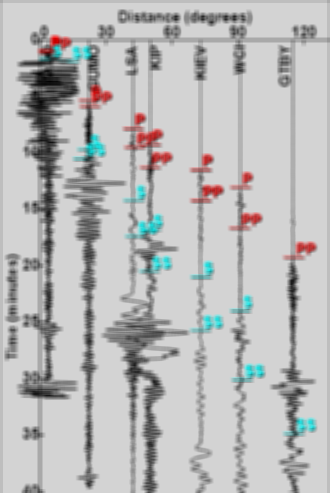

In [2]:
#lowpass filter
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


#bgr
img = cv2.imread('gelombang.png')

#rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv2_imshow(img)


# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)

cv2_imshow(kucing_filter)

# salt and pepper

Selain menggunakan `imshow` seperti di atas, kita juga dapat menggunakan modul Matplotlib, seperti berikut:

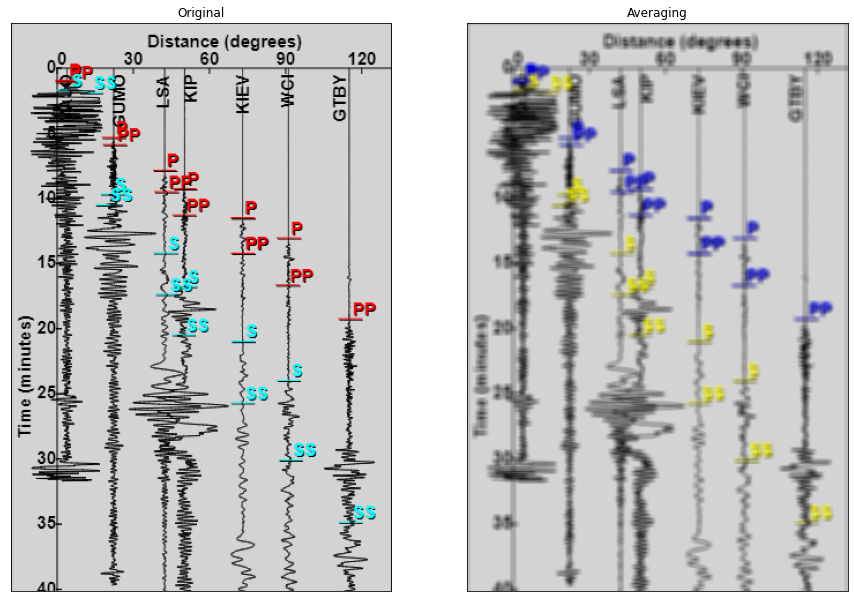

In [3]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()


Pada script di atas, kernel dibuat dengan menggunakan fungsi numpy (np.ones) dan moving window diterapkan dengan fungsi opencv (filter2D). Kedua fungsi tersebut dapat diganti dengan menggunakan perintah `cv2.blur`.

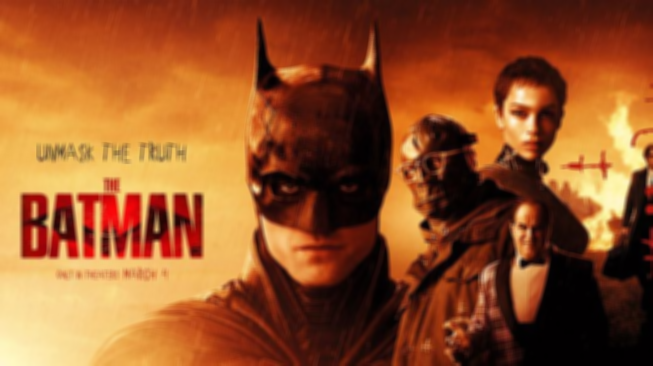

In [ ]:
batman_blur = cv2.blur(img,(5,5))

cv2_imshow(batman_blur)

Sekarang, bagaimana jika kita rubah kernelnya menjadi seperti 

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


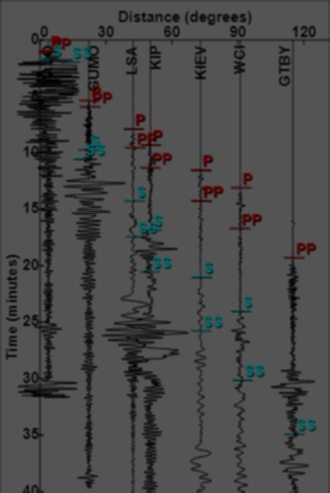

In [4]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
cv2_imshow(kucing_filter)

Fungsi *low-pass filter* di atas menerapkan rerata pada nilai piksel yang dilewati oleh kernel, sehingga disebut dengan ’moving average’ atau ’averaging’. Terdapat beberapa jenis algoritma low-pass filtering lainnya yang dapat digunakan pada kasus yang berbeda, a.l.:

1.	Gaussian Filter:
`blur = cv2.GaussianBlur(img,(5,5),0)`

2.	Median filtering:
`median = cv2.medianBlur(img,5)`

3.	Billateral Filter:
`blur = cv2.bilateralFilter(img,9,75,75)`

**2. High-Pass Filtering**

Pada contoh *Averaging* di atas kita menggunakan kernel dalam bentuk matriks. Sejauh ini kita melakukan operasi citra dengan menganggap tiap band citra merupakan domain matriks yang terdiri dari baris dan kolom. Sejatinya, kita juga dapat merepresentasikan sebuah citra sebagai *fungsi matematika* yang tersusun dari beberapa parameter. Misalnya [seperti berikut](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html):

![](https://ai.stanford.edu/~syyeung/cvweb/Pictures1/function.png)

Dengan demikian, kita juga dapat menerapkan fungsi matematis tertentu pada domain citra tersebut sehingga kita dapat memperoleh citra baru hasil pengolahan. Filtering adalah salah satu operasi yang banyak dilakukan dengan metode ini.

![](https://ai.stanford.edu/~syyeung/cvweb/Pictures1/processing.png)

Pada bagian berikut akan diberikan contoh operasi High-pass filtering yang sering digunakan untuk mempertegas tepian sebuah objek pada citra menggunakan operator Sobel dan Laplacian. Berikut adalah contoh operator Sobel:

![](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif)


In [5]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

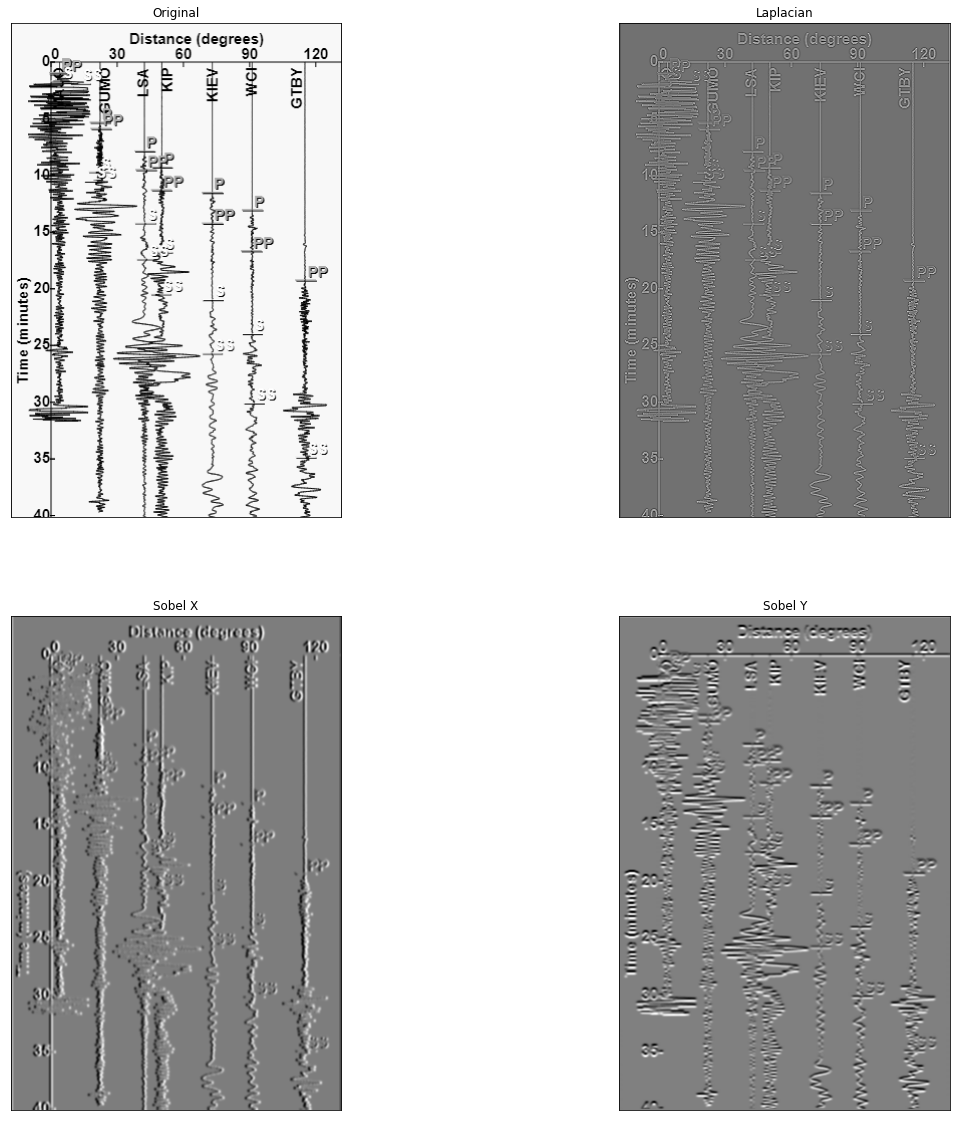

In [6]:
# Highpass Filter

# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja 
# di bagian awal, selama notebook ini tetap terhubung
import cv2
import numpy as np
from matplotlib import pyplot as plt


# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('gelombang.png',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


Fungsi di atas menerapkan algoritma dasar high-pass filtering dengan ukuran kernel berupa matriks 5x5. Hasil yang diperoleh merupakan penguatan dari informasi tepi (edge) yang ada pada citra.

OpenCV juga menyediakan algoritma yang khusus digunakan dalam ekstraksi tepi. Diantaranya adalah Canny Edges. Sebagai praktik, gunakan script berikut:

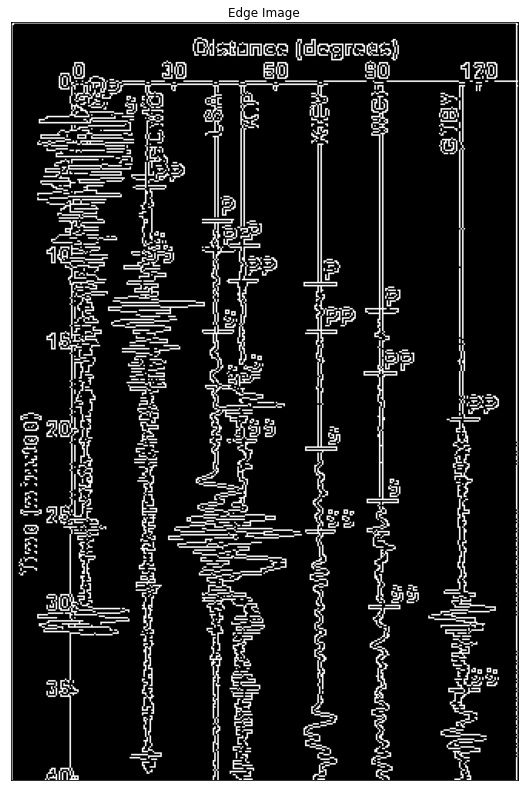

In [7]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('gelombang.png',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,100,200)

plt.subplot(111),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


Dengan merubah nilai parameter minimum dan maksimum pada perintah cv2.Canny, akan diperoleh lebih banyak atau lebih sedikit detil tergantung pada parameter yang digunakan.

Cobalah gunakan contoh gambar yang lain, kemudian lakukan operasi-operasi di atas dengan merubah parameter yang diberikan untuk melihat bagaimana pengaruhnya.

# Image Thresholding

## Konsep Thresholding

Thresholding merupakan metode yang digunakan untuk melakukan ekstraksi objek dengan memanipulasi nilai digital number yang melewati batas ambang (‘threshold’) tertentu. Sebuah fungsi kemudian menentukan apa yang terjadi pada nilai piksel yang melewati batas ambang tersebut. 


![](https://ai.stanford.edu/~syyeung/cvweb/Pictures1/lena_segmentation.png)

Sebagaimana Filtering, Thresholding juga sering digunakan sebagai perantara pada berbagai pengolahan citra untuk mendapatkan objek yang digambarkan pada citra tersebut. Thresholding merupakan salah satu metode *segmentation* yang paling sering digunakan.

## Menggunakan OpenCV untuk Thresholding

OpenCV memiliki beberapa fungsi untuk [Thresholding](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html). Binary Thresholding barangkali adalah yang paling sederhana dan banyak digunakan untuk memisahkan antara objek dengan gambar latar. Berikut adalah contoh bagaimana melakukan thresholding dengan OpenCV

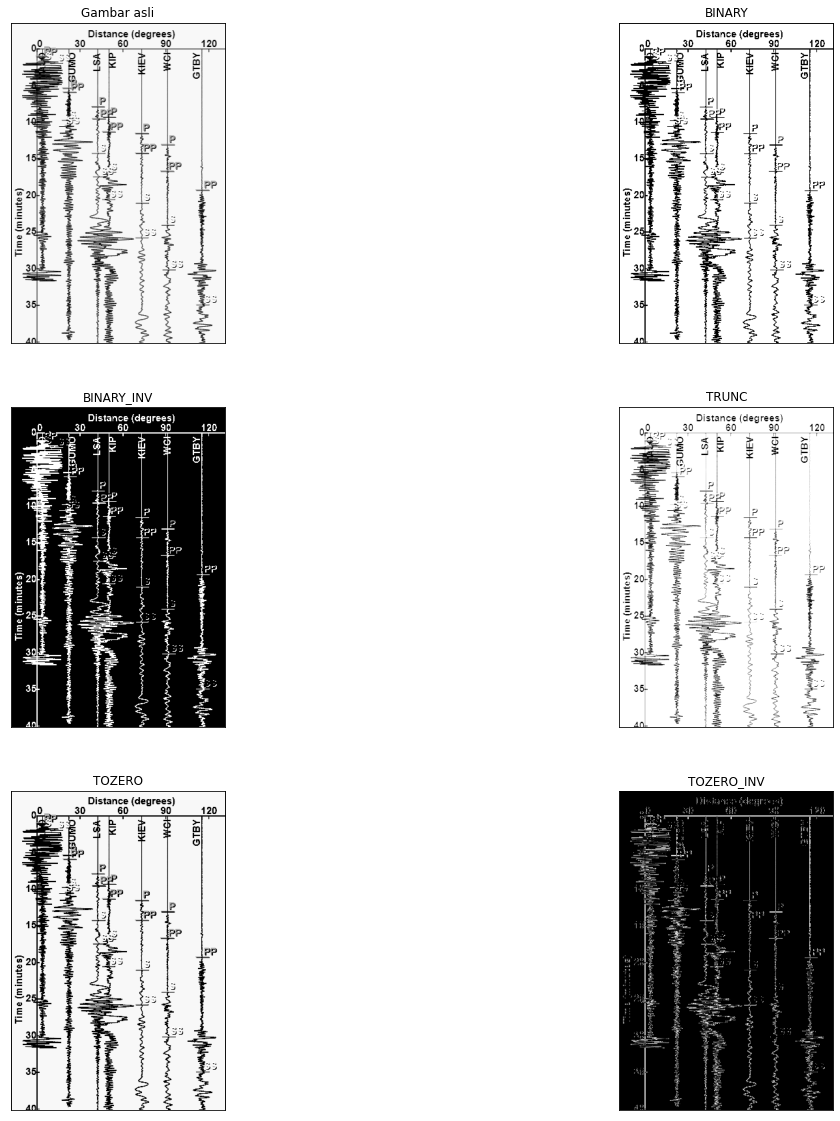

In [8]:
# membaca gambar baymax 
img = cv2.imread('gelombang.png',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Algoritma di atas merupakan metode Global threshold. Terdapat juga metode lain seperti Adaptive Threshold:

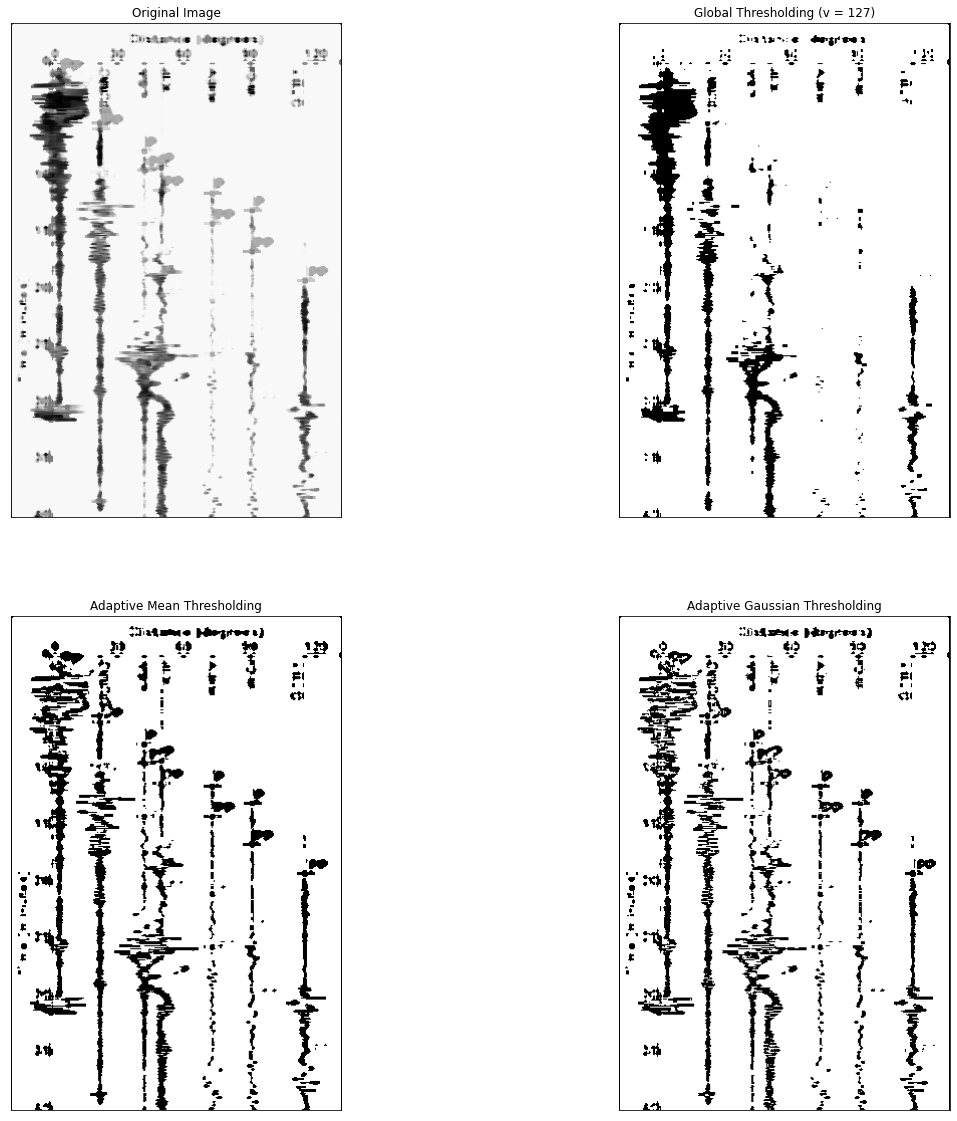

In [9]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('images/baymax.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Berikut adalah Otsu, metode Thresholding yang sering digunakan dalam ekstraksi garis pantai. [Algoritma Otsu](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html) berbeda dengan metode Thresholding lainnya di atas. Otsu menggunakan beberapa bobot sebagai parameter dalam penentuan thresholding, sehingga dapat mengolah gambar dengan nilai piksel yang lebih beragam. 

![](https://i.ytimg.com/vi/Ofi1Fn18YLc/maxresdefault.jpg)

Berikut adalah contoh penggunaan Otsu's Thresholding

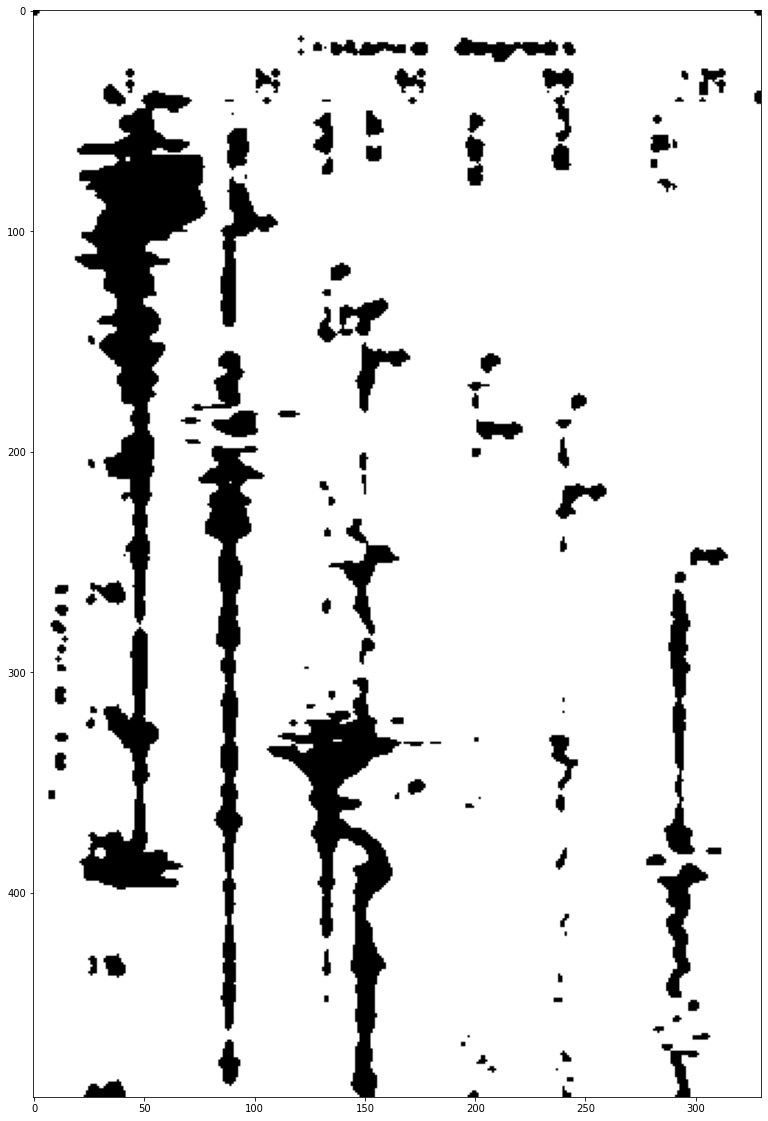

In [10]:
# Menerapkan Gaussian filtering sebelum Otsu’s thresholding
blur = cv2.GaussianBlur(img,(5,5),0)


# Otsu
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plotting
plt.imshow(th3,'gray')
plt.show()

# Ekstraksi Garis Pantai dari Citra Satelit

Dalam pekerjaan pengolahan citra, seringkali dibutuhkan pemrosesan secara bertahap sesuai dengan kondisi citra dan hasil yang diharapkan. Misalnya, untuk mendapatkan objek berupa garis pantai dari citra satelit, perlu dilakukan konversi colorspace untuk mendapatkan rentang band yang sesuai, low-pass filtering (*blurring*) untuk menghilangkan noise, kemudian menggunakan thresholding untuk menonjolkan informasi yang diinginkan sesuai dengan rentang band objek tsb (misalnya laut), dan terakhir menerapkan high-pass filtering untuk mendapatkan garis tepi pantai. 

Tiap jenis citra yang berbeda mungkin memerlukan preprocessing atau pengolahan yang berbeda pula. Pemilihan algoritma dan nilai parameter masing-masing algoritma sangat menentukan hasil akhir yang akan diperoleh. Pada bagian berikut akan diberikan contoh bagaimana mengolah citra satelit untuk mendapatkan tepi suatu objek. Anda dapat menggunakan algoritma yang Anda praktekkan di bagian ini untuk mendeteksi garis pantai menggunakan langkah sederhana.

![](https://cdn-images-1.medium.com/max/910/1*9dlH3p-sL9KBiW6rsBdhEA.png)

## Edge Detection

Deteksi tepi (*Edge Detection*) merupakan salah satu teknik yang digunakan untuk memperoleh informasi mengenai sebuah objek. Di atas telah kita bahas bahwa sebuah citra dapat dianggap memiliki domain matriks dan domain fungsi. Dengan demikian, sebuah citra dapat kita gambarkan sebagai berikut:


![alt text](https://slideplayer.com/slide/14894726/91/images/6/Images+as+functions%E2%80%A6+Edges+look+like+steep+cliffs.jpg)

Tepian citra pada gambar di atas dapat dideteksi dengan jelas sebagai sebuah 'jurang'. Jika kita dapat mendeteksi perubahan 'jurang', atau dengan kata lain **Gradient** dari tepian citra tersebut, kita akan dapat mendeteksi tepian objek yang kita inginkan, kemudian melakukan pengolahan yang diperlukan. 

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/nms.jpg)

Salah satu algoritma yang banyak digunakan dalam deteksi tepi adalah **Canny Edge**. [Algoritma Canny Edge](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) sendiri terdiri dari beberapa tahapan yang digunakan untuk mengekstraksi tepian sebuah objek pada citra. 

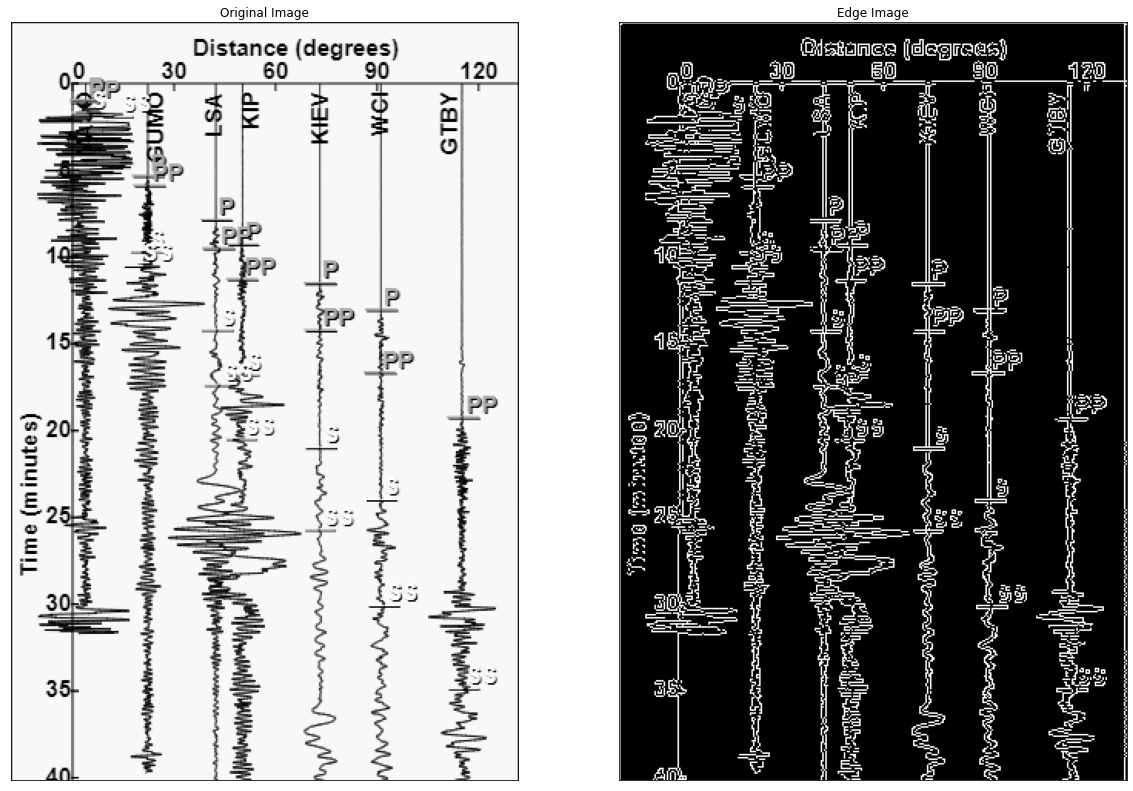

In [11]:
img = cv2.imread('gelombang.png',0)

# deteksi tepi dengan Canny Edge
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Sebagaimana dijelaskan sebelumnya, metode ekstraksi ojek pada citra dapat dilakukan secara bertahap dengan menggunakan berbagai operasi. Gambar di atas mungkin dapat menghasilkan objek yang lebih jelas setelah kita melakukan operasi geometri (misalnya pemotongan citra), filtering, dan thresholding.

Terdapat metode lain yang dapat digunakan untuk mempertegas tepian sebuah objek pada citra, yaitu **Erosi** dan **Dilatasi**, atau sering disebut sebagai **Morphological Filtering**. Teknik ini tidak akan dibahas secara khusus pada latihan kali ini, tetapi Anda disarankan untuk mempelajarinya secara mandiri melalui [link berikut](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html).

## Membuat 'Kontur' dari image

Dari hasil deteksi tepi pada Canny, kita dapat memperoleh garis tersebut dalam bentuk *kontur*. Kontur gambar ini dapat digunakan untuk berbagai keperluan, misalnya disimpan sebagai vector pada pengolahan selanjutnya, atau digunakan untuk menghitung jumlah objek yang terdapat pada citra. Algoritma kontur ini cukup sederhana, meskipun tidak akan dibahas pada bagian ini. Contoh berikut diberikan untuk memberikan gambaran bagaimana kontur pada sebuah Citra dibuat sebagai hasil dari deteksi tepi menggunakan Canny Edge.

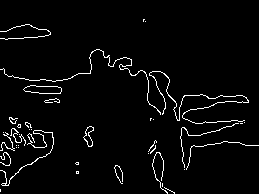

Jumlah kontur yang berhasil dideteksi = 40


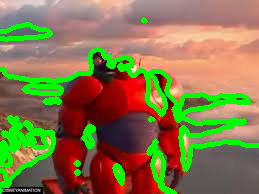

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# gambar berwarna untuk diplot
img_ori = cv2.imread('baymax.jpg')

# grayscale untuk diolah
img = cv2.imread('baymax.jpg',0)

# Menerapkan Gaussian filtering sebelum Otsu’s thresholding
blur = cv2.GaussianBlur(img,(5,5),0)

# Otsu
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Menggunakan Canny Edge untuk deteksi tepi
edged = cv2.Canny(th3, 30, 200) 
  
# mencari kontur
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2_imshow(edged)
  
print("Jumlah kontur yang berhasil dideteksi = " + str(len(contours))) 
  
# Gambar kontur yang dideteksi
# -1 artinya gambar semua kontur yang ditemukan
cv2.drawContours(img_ori, contours, -1, (0, 255, 0), 3) 
  
cv2_imshow(img_ori) 


Kita bisa menggunakan parameter-parameter dari fungsi kontur untuk melakukan berbagai hal, misalnya memilih kontur mana yang akan ditampilkan:

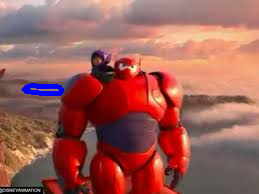

In [ ]:
# baca lagi gambar baymax: variabel sebelumnya sudah tergambar kontur
img_ori = cv2.imread('baymax.jpg')

# untuk tiap kontur yang dideteksi
for i,cnt in enumerate(contours):
  if cv2.contourArea(cnt) > 220:  
    # jika area kontur lebih dari 220 piksel, baru konturnya digambar
    cv2.drawContours(img_ori,[cnt], 0, (255), 3)  

# tampilkan gambar yang sudah diberi kontur tersebut
cv2_imshow(img_ori) 